In [1]:
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt

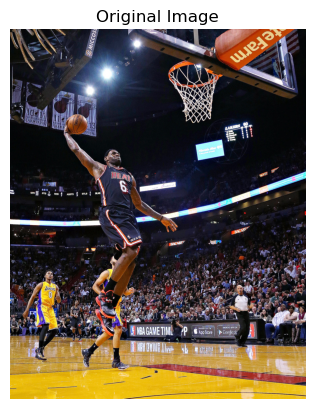

In [2]:
#getting the path to the image
image_path = os.path.abspath("./images/lebronslam.jpg")

image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB) #converts from BGR format to RGB

#showing initial image for reference
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")

#this won't show in the below image, but we also want to apply Gaussian kernel to rid off noise
image_rgb = cv.GaussianBlur(image_rgb, (5, 5), 0)

We will now use the gradient-based approach through the Sobel filter. Recall that it will split into gradients wrt X and wrt Y. Thus, we will have multiple images to show: one for the image being applied in the x-direction, one for the image being applied in the y-direction, and one for the combined magnitudes. **Please be careful, the outputs of the Sobel function aren't going to do much for us -- look at the code underneath and the comments and reread the notes to understand what exactly is going on!**

In [3]:
# params are (image, depth, order of x-derivative, order of y-derivative, ksize = intended size of kernel (1,3,5,7))
sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3) 
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)

# this is in order to compute the absolute value of the gradient
sobel_x = np.absolute(sobel_x)
sobel_y = np.absolute(sobel_y)

# this is normalizing the values of the filters within the 0-255 range so they are visible
sobel_x_normalized = np.uint8(255 * sobel_x / np.max(sobel_x))
sobel_y_normalized = np.uint8(255 * sobel_y / np.max(sobel_y))

I will plot the Sobel wrt X and Sobel wrt Y together. Note that I am using the subplot method.

(-0.5, 1535.5, 1919.5, -0.5)

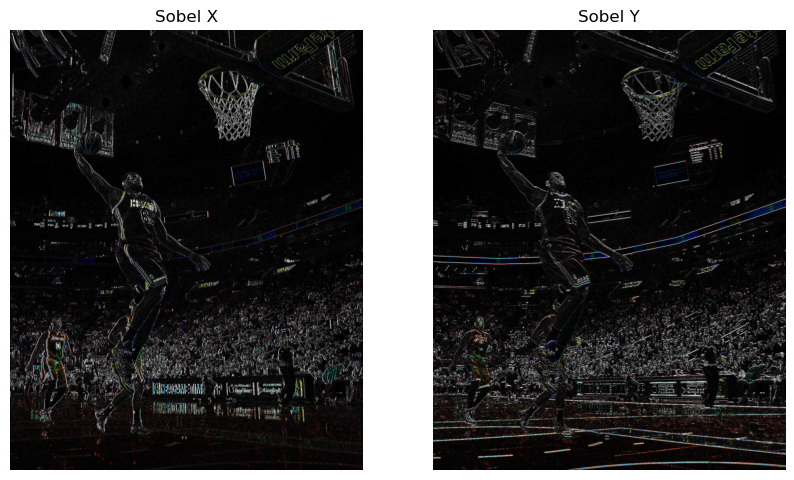

In [4]:
#adjusting the size of the canvas to fit the images nicely
plt.figure(figsize=(10, 10)) 

# Plot the Sobel Y
plt.subplot(1, 2, 1)
plt.imshow(sobel_x_normalized, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

# plotting the Sobel Y
plt.subplot(1, 2, 2)
plt.imshow(sobel_y_normalized, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

Lots of cool things to see up there, but observe the differences. Some places to look: the net, the scorers table, the jerseys in the rafter, Lebron's jersey, and the lights between the lower bowl and the nosebleeds. Let's instead plot the magnitude of the gradient instead.

(-0.5, 1535.5, 1919.5, -0.5)

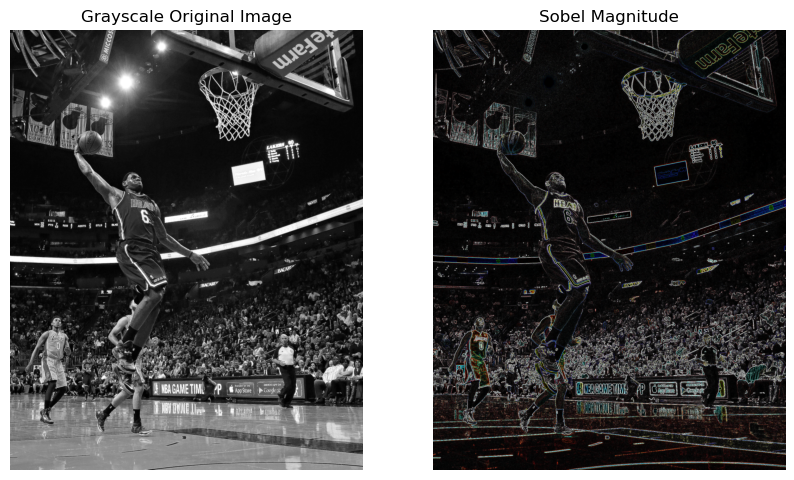

In [5]:
#computing the magnitude through Euclidean norm
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

#normalizing the values to make it visible
sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))

#plotting the sobel_magnitude filter next to the initial image
plt.figure(figsize=(10, 10)) 

#making the initial image grayscale to see the differences easier
image_gray = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)

# Plot initial image
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Original Image')
plt.axis('off')

# plotting the Sobel Y
plt.subplot(1, 2, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

See how the two are pretty different - look atthe scorers table, the rafters (jerseyes hanging in the back), the floor, and the division between the lower bowl and the nosebleeds. You'll see that the Sobel filter has given those all a "dark" color because there are no edges or changes in color there, while the filter has given lines/locations where changes in color *are* there a lighter shade!